In [1]:
import os, sys

sys.path.append(os.path.dirname(os.path.realpath("../src")))

import random
import pandas as pd

from src.feed_handler.csv_storage import csvStorage
from src.RSS_abstracts.RSSEntry import RSSEntry
from time import gmtime

In [2]:
def random_RSS_Entry(id):
    _r = RSSEntry(
        id=id,
        title=f"{id}: A Budapest-Hatvan-Miskolc vonalon megnő a menetidő",
        link=f'https://www.mavcsoport.hu/node/{id}',
        published="Fri, 25 Nov 2022 08:05:17 +0100",
        published_parsed=gmtime()
        )
    _r.unparsed = "{'title': 'A Budapest-Hatvan-Miskolc vonalon megnő a menetidő', 'title_detail': {'type': 'text/plain', 'language': 'hu', 'base': 'https://www.mavcsoport.hu/mav-csoport/hirek', 'value': 'A Budapest-Hatvan-Miskolc vonalon megnő a menetidő'}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'https://www.mavcsoport.hu/node/114141'}], 'link': 'https://www.mavcsoport.hu/node/114141', 'summary': '', 'summary_detail': {'type': 'text/html', 'language': 'hu', 'base': 'https://www.mavcsoport.hu/mav-csoport/hirek', 'value': ''}, 'published': 'Fri, 25 Nov 2022 08:05:17 +0100', 'published_parsed': time.struct_time(tm_year=2022, tm_mon=11, tm_mday=25, tm_hour=7, tm_min=5, tm_sec=17, tm_wday=4, tm_yday=329, tm_isdst=0), 'authors': [{'name': 'MÁV.hu szerkesztőség'}], 'author': 'MÁV.hu szerkesztőség', 'author_detail': {'name': 'MÁV.hu szerkesztőség'}, 'id': '114141', 'guidislink': False}"
    return _r


In [3]:
from datetime import datetime
from time import mktime

big_data = [random_RSS_Entry(random.randint(10000,15000)) for _ in range(5000)]
df = pd.DataFrame(big_data)
df['published_datetime'] = df["published_parsed"].transform(
                lambda x: datetime.fromtimestamp(mktime( x ))
            )
df.to_csv('big_test_file.csv',index=False)

In [4]:
import timeit

storage = csvStorage('big_test_file.csv')

In [5]:

def addrandom():
    storage.add_event(random_RSS_Entry(random.randint(10000,15000)))

timer = timeit.Timer(addrandom,globals=globals())
ex_time = timer.timeit(30)/30

print(ex_time)
del storage

0.20422835333326173


In [6]:
#FULL on test
from time import process_time


test_cases = [10,100,1000,2000,3000,5000,7000,9000,10000,20000]
test_results = list()

def data_setup(size):
    big_data = [random_RSS_Entry(random.randint(1000,100000)) for _ in range(size)]
    df = pd.DataFrame(big_data)
    df['published_datetime'] = df["published_parsed"].transform(
                    lambda x: datetime.fromtimestamp(mktime( x ))
                )
    df.to_csv('big_test_file.csv',index=False)

def addrandom():
    storage.add_event(random_RSS_Entry(random.randint(10000,15000)))


for size in test_cases:
    result = dict()
    result['size'] = size
    data_setup(size)
    start = process_time()
    storage = csvStorage('big_test_file.csv')
    result['init [s]'] = process_time() - start

    timer = timeit.Timer(addrandom,globals=globals()) 
    pre_time = timer.timeit(5)/5
    print(size,pre_time)
    repeat = int(max(20/pre_time,15.))
    result['add [s]'] = timer.timeit(repeat)/repeat
    result['repeat'] = repeat
    test_results.append(result)

    del storage

10 0.009002059999329504
100 0.02027017999935197
1000 0.11300009999977192
2000 0.22042439999931956
3000 0.3237126400010311
5000 0.5663174800007255
7000 0.809243140000035
9000 0.9823327799997059
10000 0.648291039999458
20000 2.095569059999252


In [7]:
for res in test_results:
    print(res)

{'size': 10, 'init [s]': 0.046875, 'add [s]': 0.08498009131022043, 'repeat': 2221}
{'size': 100, 'init [s]': 0.203125, 'add [s]': 0.05956649584179, 'repeat': 986}
{'size': 1000, 'init [s]': 1.984375, 'add [s]': 0.11814260340911047, 'repeat': 176}
{'size': 2000, 'init [s]': 4.0625, 'add [s]': 0.20432019111111813, 'repeat': 90}
{'size': 3000, 'init [s]': 6.890625, 'add [s]': 0.2975823934425907, 'repeat': 61}
{'size': 5000, 'init [s]': 10.015625, 'add [s]': 0.5529381057143578, 'repeat': 35}
{'size': 7000, 'init [s]': 15.515625, 'add [s]': 0.7048223416665375, 'repeat': 24}
{'size': 9000, 'init [s]': 18.6875, 'add [s]': 0.9102759599998536, 'repeat': 20}
{'size': 10000, 'init [s]': 20.421875, 'add [s]': 0.9160729866666467, 'repeat': 30}
{'size': 20000, 'init [s]': 39.453125, 'add [s]': 2.017268866666806, 'repeat': 15}


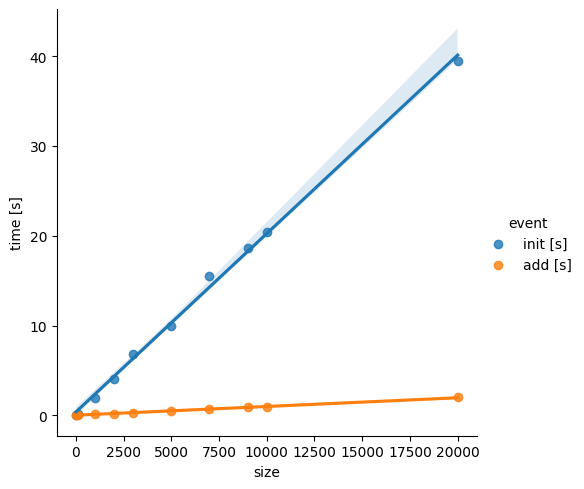

In [18]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(test_results)
df2 = df[['size','init [s]','add [s]']].melt(['size'],var_name='event',value_name='time [s]')
sns.lmplot(data=df2,x='size',y='time [s]',hue='event')


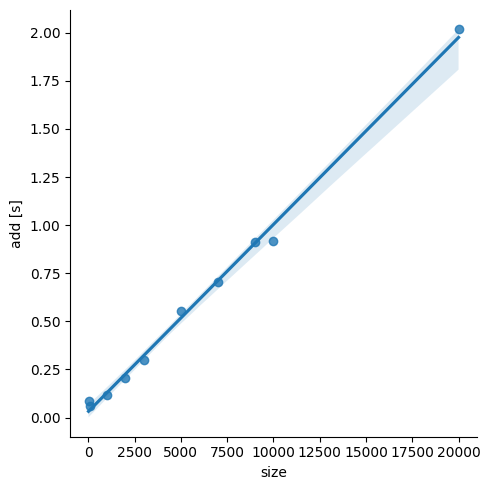

In [19]:
sns.lmplot(data=df,x='size',y='add [s]')